In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import words
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./AI_Human.csv")

# **Información básica**

In [3]:
df.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       487235 non-null  object 
 1   generated  487235 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.4+ MB


In [5]:
df.describe()

,generated
count,487235.000000
mean,0.372383
std,0.483440
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


### **Distribución de clases**

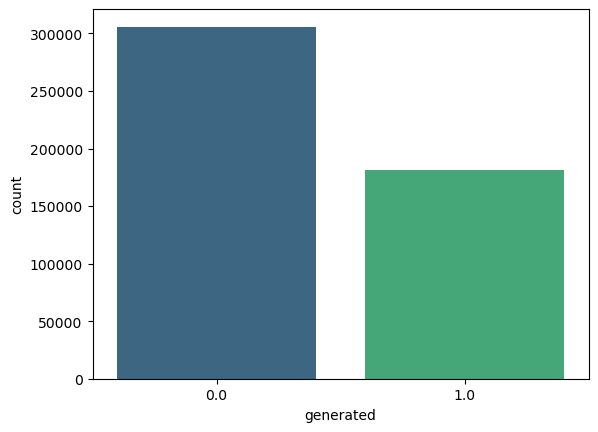

In [31]:
sns.countplot(data=df, x="generated", hue="generated", palette="viridis", legend=False)
plt.show()

In [33]:
print("Total Texts:", df["generated"].count())
print("Human Written Texts:", (df["generated"] == 0.0).sum())
print("AI Generated Texts:", (df["generated"] == 1.0).sum())

Total Texts: 487235
Human Written Texts: 305797
AI Generated Texts: 181438


# **Preprocesamiento**

Para evitar errores de procesamiento se remueven los saltos de línea, apóstrofes, signos de puntuación y palabras irrelevantes que no suelen ser útiles para el análisis de datos.

In [8]:
df["text"][0]

'Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.\n\nIn like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article

### **Remover saltos de saltos de línea y apóstrofes**

In [9]:
def remove_tags(text: str) -> str:
    text = text.replace("\n", "").replace("'", "")
    return text

df["text"] = df["text"].apply(remove_tags)

In [10]:
df["text"][0]

'Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.In like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article, "P

### **Remover signos de puntuación**

In [11]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
def remove_punctuation(text: str) -> str:
    regex = f"[{re.escape(string.punctuation)}]"
    return re.sub(regex, "", text)

df["text"] = df["text"].apply(remove_punctuation)

In [13]:
df["text"][0]

'Cars Cars have been around since they became famous in the 1900s when Henry Ford created and built the first ModelT Cars have played a major role in our every day lives since then But now people are starting to question if limiting car usage would be a good thing To me limiting the use of cars might be a good thing to doIn like matter of this article In German Suburb Life Goes On Without Cars by Elizabeth Rosenthal states how automobiles are the linchpin of suburbs where middle class families from either Shanghai or Chicago tend to make their homes Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europeand up to 50 percent in some carintensive areas in the United States Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go Article Paris bans driving due to 

In [35]:
nltk.download("words")
english_words = set(words.words())

def is_spelled_correctly(word: str) -> bool:
    return word in english_words

[nltk_data] Downloading package words to /Users/luisccode/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [36]:
word_to_check = df["text"][487232]

if is_spelled_correctly(word_to_check):
    print(f"The word '{word_to_check}' is spelled correctly.")
else:
    print(f"The word '{word_to_check}' is spelled incorrectly.")

The word 'firmly believe governments worldwide take immediate action address pressing issue climate change consequences inaction catastrophic planet future generations several competing reasons support positionFirstly climate change poses significant threat natural environment earths temperature rising alarming rate resulting meeting ice caps rising sea Levels increase extreme weather events hurricanes droughts heatwaves environmental changes devastating impact ecosystems resulting Loss biodiversity habitat destruction species extinction example Great Barrier Reef one biodiverse ecosystems planet seen significant decline recent years due coral bleaching caused warming ocean temperaturesSecondly negative impacts climate change extend beyond environmental concerns affecting human health economic growth planet warms spread diseases pests increase Leading frequent outbreaks illnesses malaria dengue fever Additionally economic costs associated climate change including damage infrastructure 

In [16]:
df['text'][487232]

'I firmly believe that governments worldwide should take immediate action to address the pressing issue of climate change as the consequences of inaction with be catastrophic for the planet and future generations There are several competing reasons that support my positionFirstly climate change poses a significant threat to our natural environment The earths temperature is rising at an alarming rate resulting in meeting ice caps rising sea Levels and an increase in extreme weather events such as hurricanes droughts and heatwaves These environmental changes have a devastating impact on ecosystems resulting in the Loss of biodiversity habitat destruction and species extinction For example the Great Barrier Reef one of the most biodiverse ecosystems on the planet has seen a significant decline in recent years due to coral bleaching caused by warming ocean temperaturesSecondly the negative impacts of climate change extend beyond environmental concerns affecting human health and economic gr

### **Remover palabras innecesarias(Stop words)**

In [17]:
nltk.download('punkt')
nltk.download("punkt_tab")
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def remove_stopwords(text: str) -> str:
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_words= " ".join(filtered_words)
    return filtered_words

df["text"] = df["text"].apply(remove_stopwords)

[nltk_data] Downloading package punkt to /Users/luisccode/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/luisccode/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/luisccode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
df["text"][0]

'Cars Cars around since became famous 1900s Henry Ford created built first ModelT Cars played major role every day lives since people starting question limiting car usage would good thing limiting use cars might good thing doIn like matter article German Suburb Life Goes Without Cars Elizabeth Rosenthal states automobiles linchpin suburbs middle class families either Shanghai Chicago tend make homes Experts say huge impediment current efforts reduce greenhouse gas emissions tailpipe Passenger cars responsible 12 percent greenhouse gas emissions Europeand 50 percent carintensive areas United States Cars main reason greenhouse gas emissions lot people driving around time getting need go Article Paris bans driving due smog Robert Duffer says Paris days nearrecord pollution enforced partial driving ban clear air global city also says Monday motorist evennumbered license plates ordered leave cars home fined 22euro fine 31 order would applied oddnumbered plates following day Cars reason poll

# **División del dataset**

In [19]:
y = df["generated"]
X = df["text"]

In [37]:
# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [21]:
print(len(X_train))
print(len(y_train))

341064
341064


# **Pipeline**

1. **CountVectorizer**: este paso convierte el texto en una matriz de frecuencia de palabras, es decir, crea un vector que representa la cantidad de veces que cada palabra aparece en el texto. Se trata de una representación simple de texto a número.

2. **TfidfTransformer**: tras obtener la matriz de frecuencia de palabras, este paso aplica la ponderación TF-IDF (Term Frequency-Inverse Document Frequency), que ajusta las frecuencias de palabras considerando su relevancia dentro del conjunto de documentos. Esto ayuda a resaltar las palabras importantes y reduce el impacto de las palabras comunes (como "el", "y", "de").

3. **MultinomialNB**: Este es un clasificador Naive Bayes basado en el modelo de distribución multinomial. Se utiliza comúnmente para clasificación de texto (como clasificación de correos electrónicos o sentimientos), y su función es predecir una categoría o clase para el texto dado.

In [38]:
pipeline = Pipeline([
    ("count_vectorizer", CountVectorizer()),  
    ("tfidf_transformer", TfidfTransformer()),  
    ("naive_bayes", MultinomialNB())])

In [40]:
# Entrena el pipeline con los datos de entrenamiento
pipeline.fit(X_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('tfidf_transformer', TfidfTransformer()),
                ('naive_bayes', MultinomialNB())])

In [42]:
# Predice las etiquetas para los datos de prueba
y_pred = pipeline.predict(X_test)

# **Evaluación de resultados**

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     91597
         1.0       0.98      0.89      0.94     54574

    accuracy                           0.95    146171
   macro avg       0.96      0.94      0.95    146171
weighted avg       0.96      0.95      0.95    146171



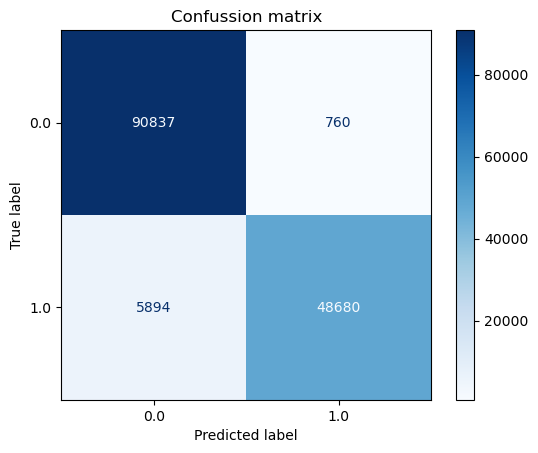

In [49]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confussion matrix")
plt.show()

# **Conclusiones**

La evaluación de los resultados muestra que el modelo tiene un rendimiento bastante bueno en general. La precisión es alta para ambas clases, 0.94 para la clase 0.0 y 0.98 para la clase 1.0. Además, el modelo tiene un buen recall, especialmente para la clase 0.0 (0.99), lo que significa que identifica correctamente la mayoría de los ejemplos de esa clase. El F1-score tiene un valor de 0.96 para la clase 0.0 y 0.94 para la clase 1.0, lo que indica un buen balance entre precisión y recall.

La precisión global del modelo es del 95%, lo que significa que en promedio el modelo acertó en la mayoría de sus predicciones. La media ponderada también muestra un buen rendimiento, con un F1-score de 0.95.